In [5]:
import os
import sys
from chordUtils import json2lab
from subprocess import call
import json
import argparse
import chordUtils
import essentia.standard
import vamp
import numpy as np
import re
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from scipy.misc import logsumexp

sns.set(style="white", context="talk")
degrees=['I', 'III']
# TODO: names
logRatioBasis=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
#degrees=['I', 'IIb', 'II', 'IIIb', 'III', 'IV', 'Vb', 'V', 'VIb', 'VI', 'VIIb', 'VII']


def normalize(chromas, norm = 'l2'):
    #data=preprocessing.normalize(chromas)
    data=preprocessing.normalize(chromas, norm=norm)
    # '/1000' is a hack in order to eliminate zero deviation.
    #data[data < -2.0] = data[data < -2.0]/10000.0-5
    #data[np.isnan(data)] = -5
    #data[np.isinf(data)] = -5

    return data

In [6]:
def fitMixture(data, max_components=40, min_components=1):
    bic = 1000000
    bic_i = 0
    for i in range(min_components, max_components):
        gm = GaussianMixture(
            n_components=i, covariance_type='full',
            max_iter=200,
            random_state = 8)
        gm.fit(data)
        curBic = gm.bic(data)
        #print i, curBic, gm.converged_
        if (curBic < bic):
            bic = curBic
            bic_i = i
        #print gm.weights_
    gm = GaussianMixture(
        n_components=bic_i, covariance_type='full',
        max_iter=200,
        random_state = 8)
    gm.fit(data)
    return gm

# Chroma Normalization
Unnoramlized: depends on loudness
Max: distributed on part of the hypercube surface
L2: distributed on part of the sphere surface 
L1: distributed on simplex

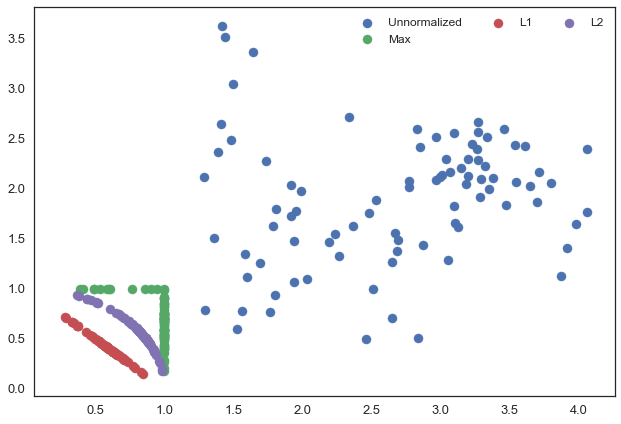

In [3]:
# Unnormalized
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../guitar.npz')
chromas = chromas[:,[0,4]]
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
un=plt.scatter(dMaj['I'], dMaj['III'])

#max
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../guitar.npz')
chromas = normalize(chromas[:,[0,4]], norm='max')
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
m=plt.scatter(dMaj['I'], dMaj['III'])

#L1
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../guitar.npz')
chromas = normalize(chromas[:,[0,4]], norm='l1')
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
l1=plt.scatter(dMaj['I'], dMaj['III'])

#L2
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../guitar.npz')
chromas = normalize(chromas[:,[0,4]], norm='l2')
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
l2=plt.scatter(dMaj['I'], dMaj['III'])

plt.legend((un, m, l1, l2),
           ('Unnormalized', 'Max', 'L1', 'L2'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=12)

plt.show()

# Fit mixture of gaussians.

True
-982.416904723
[ 0.13793104  0.86206896]
True
-891.202791577
[ 0.12679559  0.27724277  0.09195402  0.04597701  0.33092595  0.08100305
  0.04610161]
True
-1100.06133752
[ 1.]


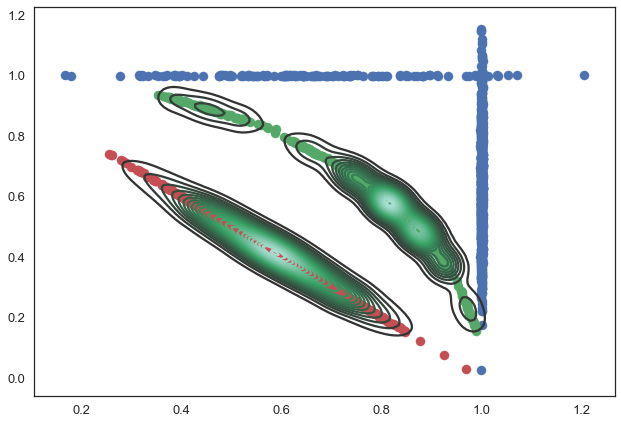

In [4]:
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
#un=plt.scatter(dMaj['I'], dMaj['III'])

#max
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../guitar.npz')
chromas = normalize(chromas[:,[0,4]], norm='max')
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
gm = fitMixture(dMaj.values)
print gm.converged_
print gm.bic(dMaj)
print gm.weights_
samples = np.asarray(gm.sample(1000)[0])
plt.scatter(samples[:,0], samples[:,1])

#l2
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../guitar.npz')
chromas = normalize(chromas[:,[0,4]], norm='l2')
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
gm = fitMixture(dMaj.values)
print gm.converged_
print gm.bic(dMaj)
print gm.weights_
samples = np.asarray(gm.sample(1000)[0])
plt.scatter(samples[:,0], samples[:,1])
sns.kdeplot(samples, n_levels=30)

#l1
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../guitar.npz')
chromas = normalize(chromas[:,[0,4]], norm='l1')
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
gm = fitMixture(dMaj.values)
print gm.converged_
print gm.bic(dMaj)
print gm.weights_
samples = np.asarray(gm.sample(1000)[0])
plt.scatter(samples[:,0], samples[:,1])
sns.kdeplot(samples, n_levels=30)

plt.show()

Imagine, we have peak at (1.0, 1.0).
For 'MAX': normalization: at least two distribution.
For 'L2': at least two (much many are detected according to BIC)
For 'L1': onlye one.
BUT IF WE HAVE PEAK AT THE BORDER:
Gaussian can't model assymetry:
   - Mode is shifted to the center.
   - spread more then actual definition (leakage).

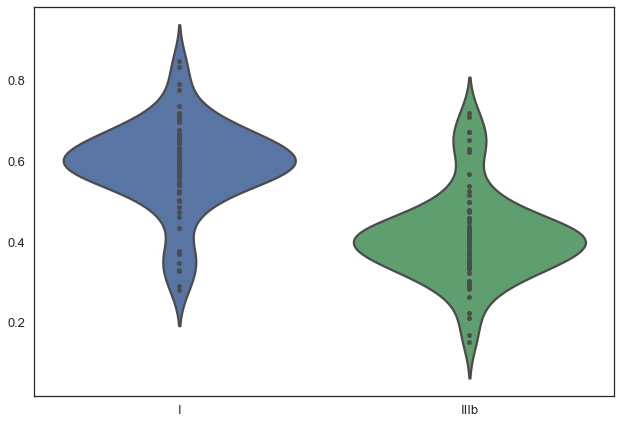

True
-1206.35547979
[ 1.]
True
-1132.06935458
[ 0.34141854  0.38459692  0.22721524  0.04676929]
True
-1199.71673604
[ 1.]


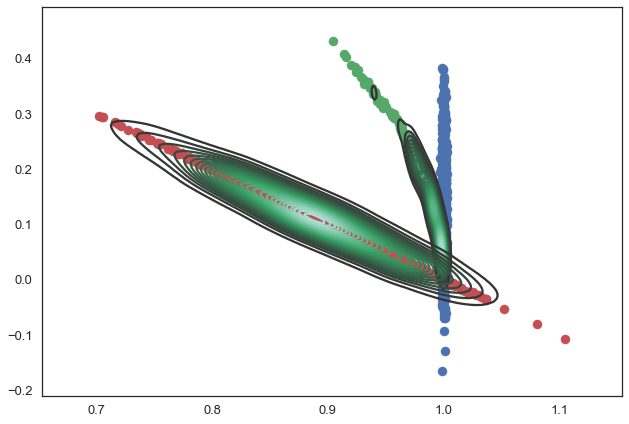

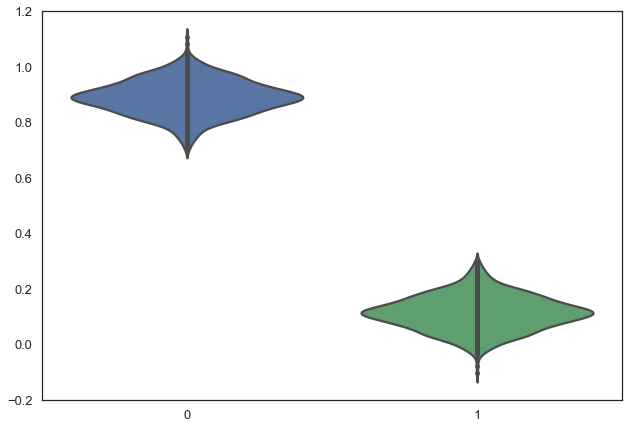

In [5]:
degrees=['I', 'IIIb']
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
sns.violinplot(data=dMaj, inner="point")
plt.show()

#un=plt.scatter(dMaj['I'], dMaj['III'])

#max
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../guitar.npz')
chromas = normalize(chromas[:,[0,3]], norm='max')
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
gm = fitMixture(dMaj.values)
print gm.converged_
print gm.bic(dMaj)
print gm.weights_
samples = np.asarray(gm.sample(1000)[0])
plt.scatter(samples[:,0], samples[:,1])

#l2
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../guitar.npz')
chromas = normalize(chromas[:,[0,3]], norm='l2')
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
gm = fitMixture(dMaj.values)
print gm.converged_
print gm.bic(dMaj)
print gm.weights_
samples = np.asarray(gm.sample(1000)[0])
plt.scatter(samples[:,0], samples[:,1])
sns.kdeplot(samples, n_levels=30)

#l1
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../guitar.npz')
chromas = normalize(chromas[:,[0,3]], norm='l1')
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
gm = fitMixture(dMaj.values)
print gm.converged_
print gm.bic(dMaj)
print gm.weights_
samples = np.asarray(gm.sample(1000)[0])
plt.scatter(samples[:,0], samples[:,1])
sns.kdeplot(samples, n_levels=30)

plt.show()
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
sns.violinplot(data=samples, inner="point")
plt.show()

Actully, we have 12D but not 2D, the problems are essentially the same.
We have inaccurate and "heavy" models not because of the task complexity, but because of poor modelling.
Suggestion: model distribution on simplex (after L1 normalization).
Besides: we get distribution of proportions. Actually, pitch class set as used by Temperley and others is a set of proportions (sum up to one), so it's logical to apply same rule to chroma.

CONTRA: almost no ready-made algorithm implementations.
PRO: lot of papers in spheres of Bioinformatics, [visual] image recognition, statistics, chemestry, etc.
Options: Dirichlet, Mixture of Dirichlet, "Extended" Dirichlet (and mixture), "Compositional Data Analysis" by John Aitchison.
In particular: http://www.compositionaldata.com/codapack.php




# Log-ratio normal mixture

In [7]:
def imputeZeros(data):
    data[data == 0] = 0.0001 
    return preprocessing.normalize(data, norm='l1')

In [8]:
def toLogRatio(chromaVector) :
    res = np.zeros(11)
    product = 1.0
    for i in range(11):
        product = product * chromaVector[i]
        ii = i + 1.0
        res[i] = np.sqrt(ii / (ii + 1)) * np.log( product ** (1.0/ii) / chromaVector[i + 1])
    return res

In [9]:
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../guitar.npz')
chromas = normalize(chromas, norm='l1')

In [10]:
c = imputeZeros(chromas)

In [11]:
c = np.apply_along_axis(toLogRatio, 1, c)

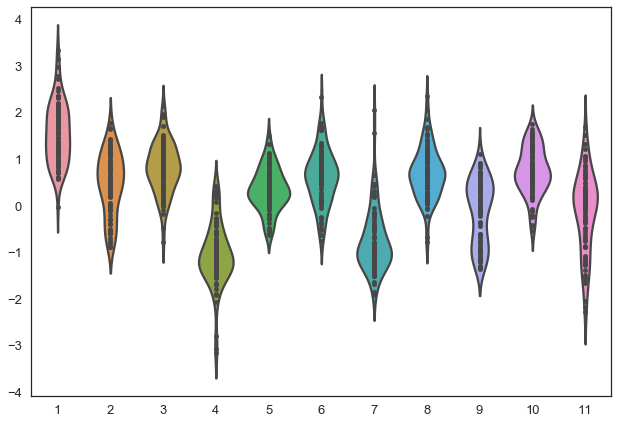

In [12]:
dMaj = pd.DataFrame(data=c[kinds =='maj'], columns=logRatioBasis)
sns.violinplot(data=dMaj, inner="point")
plt.show()

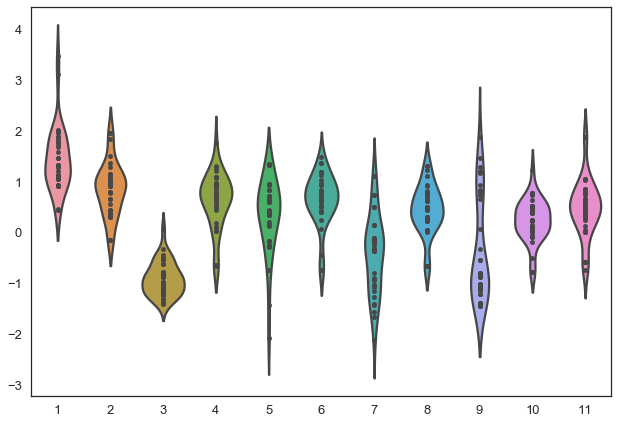

In [13]:
dMaj = pd.DataFrame(data=c[kinds =='min'], columns=logRatioBasis)
sns.violinplot(data=dMaj, inner="point")
plt.show()